# __ISE 244 Final Project Presentation__
## Charanveer Singh
### Submitted to: Shilpa Gupta
### Submitted on: May 12, 2022
###### Paper link: https://arxiv.org/ftp/arxiv/papers/2009/2009.10819.pdf
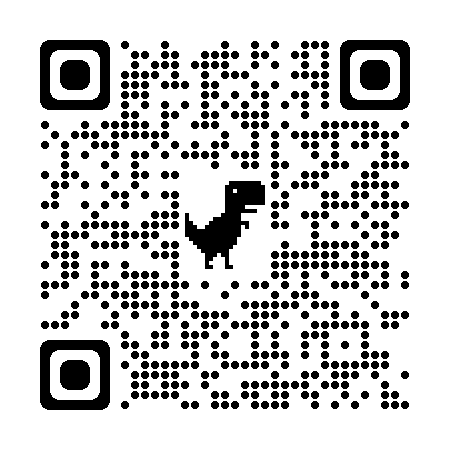

## __RNN Model__

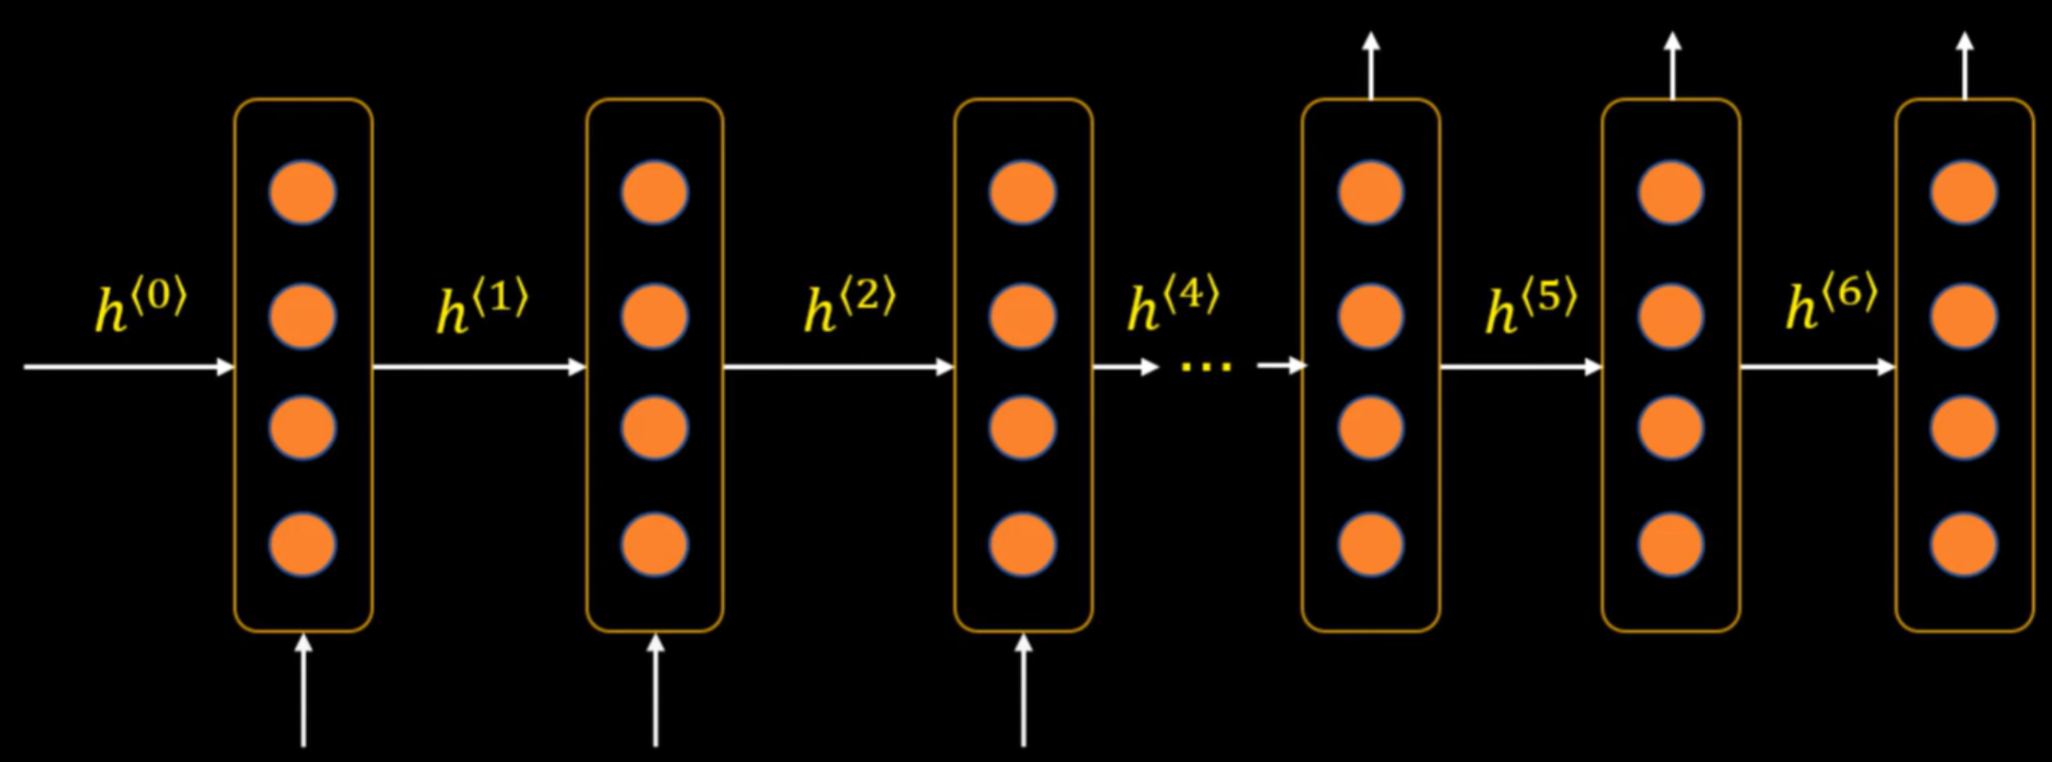


## __LSTM Model__

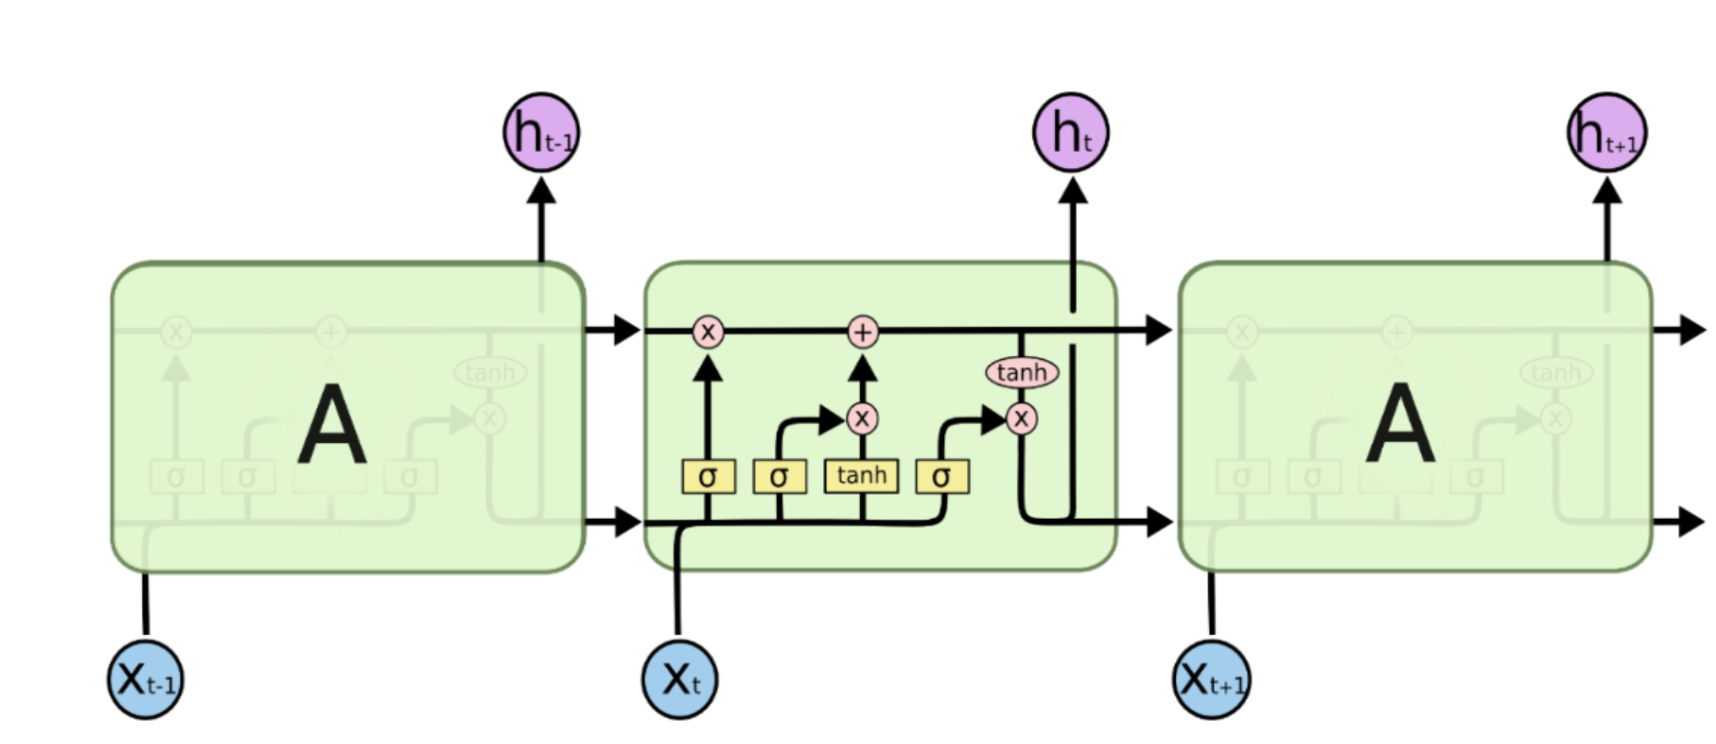

## __ARIMA Model__



ARIMA, which stands for 'AutoRegressive Integrated Moving Average,' is a forecasting algorithm that is based on the idea that information in past values of a time series can be used to predict future values.

In [ ]:
#Importing necessary libraries
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
from keras.models import Sequential
from matplotlib.pylab import rcParams
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
#Read the Dataset 
df=pd.read_csv("NSE-Tata.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [ ]:
#Set index as date
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2018-10-08,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
2018-10-05,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2018-10-04,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
2018-10-03,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
2018-10-01,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


## __Dataset Attributes Description__

* Date: Date when the stock price was observed

* Open: Starting stock price for the day

* High: Highest stock price for the day

* Low: Lowest stock price for the day

* Last: Last Stock price noted for a day

* Close: Stock closing price for the day

* Total Trade Quantity: The number of times stock has been traded

* Turnover: The number of shares exchanged times the price of each share

In [ ]:
#Dataset shape
df.shape

(1235, 8)

Text(0.5, 1.0, 'Stock Close Price history')

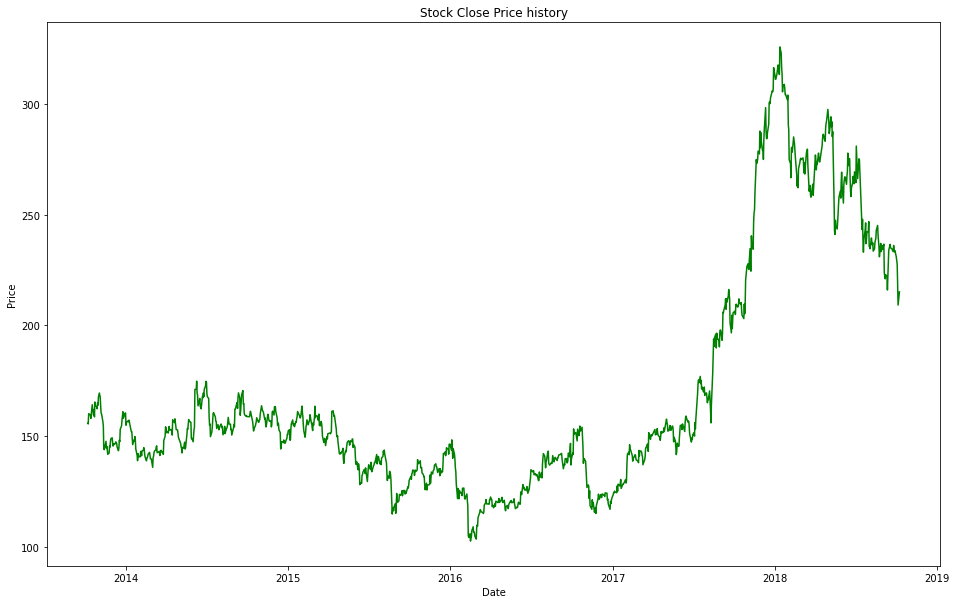

In [ ]:
#NIFTY-50 Stock Close price Visualization
plt.figure(figsize=(16,10))
plt.plot(df["Close"], "g")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title('Stock Close Price history')

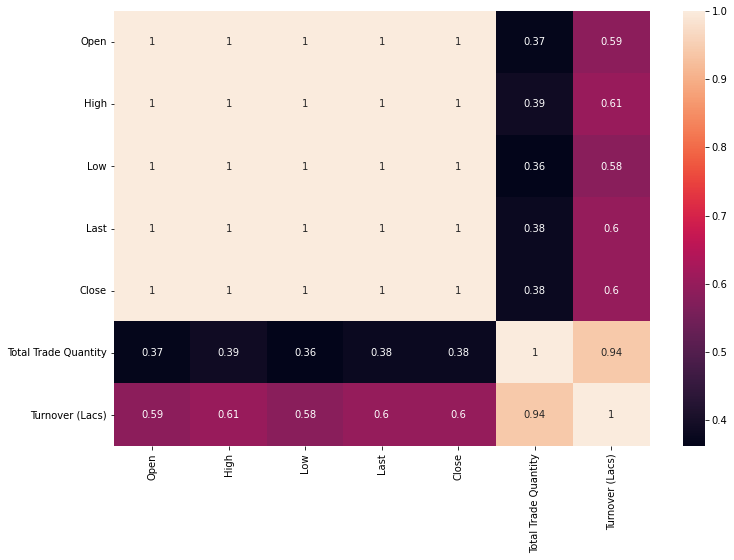

In [ ]:
#Corelation of dataset variables
import seaborn as sns
correlation = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation, annot=True)

## __Data Preprocessing__

In [ ]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
new_dataset

,Date,Close
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
1230,NaN,NaN
1231,NaN,NaN
1232,NaN,NaN
1233,NaN,NaN


In [ ]:
#Create new dataset with Date and Close attributes
for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["Close"][i]

new_dataset.index=new_dataset.Date
new_dataset.drop("Date",axis=1,inplace=True)

final_dataset=new_dataset.values

new_dataset

,Close
Date,
2013-10-08,155.8
2013-10-09,155.55
2013-10-10,160.15
2013-10-11,160.05
2013-10-14,159.45
...,...
2018-10-01,230.9
2018-10-03,227.6
2018-10-04,218.2


In [ ]:
#Standard 80-20 split
train_data=final_dataset[0:987,:]
valid_data=final_dataset[987:,:]

In [ ]:
#Scale the data using normalization
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)

x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

In [ ]:
#Change data to numpy array
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)
x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

# LSTM Model

In [ ]:
#Initialize Neural network
lstm_model=Sequential()
#Adding the first LSTM layer
#Units = dimensionality of the output space
lstm_model.add(LSTM(50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))

#Adding second LSTM layer
lstm_model.add(LSTM(50))

#Adding final Output layer
lstm_model.add(Dense(1))
#Display model summary
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Fitting the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(x_train_data,y_train_data,epochs=3,batch_size=1,verbose=2)

Epoch 1/3
927/927 - 39s - loss: 9.7535e-04 - 39s/epoch - 42ms/step
Epoch 2/3
927/927 - 21s - loss: 4.6911e-04 - 21s/epoch - 22ms/step
Epoch 3/3
927/927 - 21s - loss: 3.9827e-04 - 21s/epoch - 23ms/step


In [ ]:
# Take a sample of a dataset to make stock price predictions using the LSTM model:
inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
closing_price = lstm_model.predict(X_test)
closing_price=scaler.inverse_transform(closing_price)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


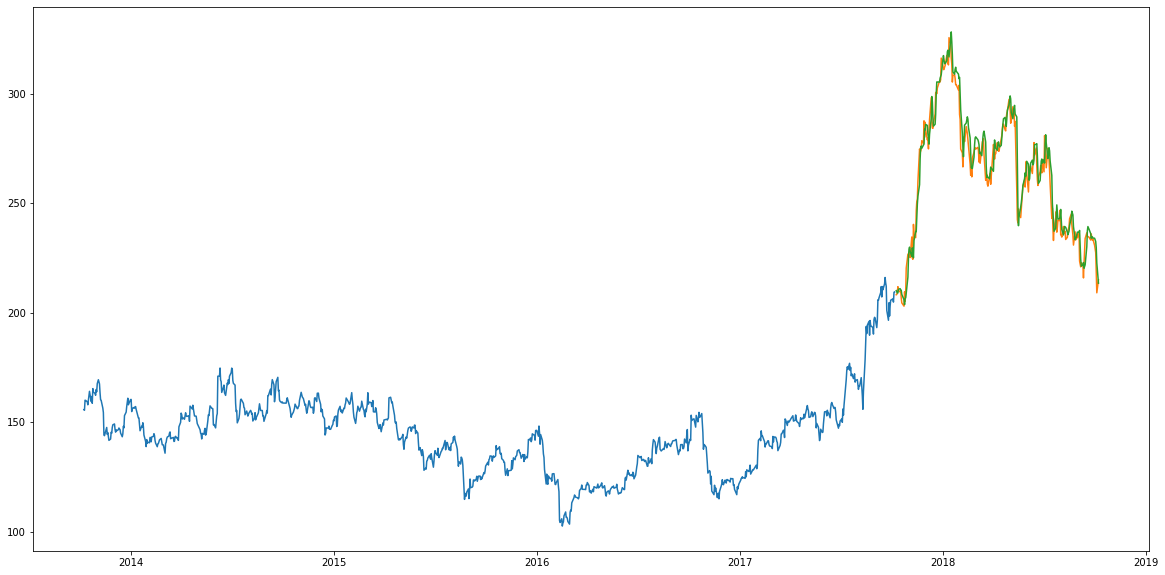

In [ ]:
#Predicted price visualization
train_data=new_dataset[:987]
valid_data=new_dataset[987:]
valid_data['Predictions'] = closing_price
plt.figure(figsize=(20,10))
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close', "Predictions"]])

In [ ]:
#Display error values
rmse = sqrt (mean_squared_error(closing_price,valid_data["Close"]))
print("RMSE Score for LSTM Model: " + str(rmse))
mae = mean_absolute_error(closing_price,valid_data["Close"])
print("MAE Score for LSTM Model: " + str(mae))

RMSE Score for LSTM Model: 6.843326775716491
MAE Score for LSTM Model: 5.097967037077872


# __ARIMA Model__

Auto Regressive Integrated Moving Average model also known as the ARIMA model uses a technique to predict future values based on information from the past. In ARIMA: 

AR stands for Auto regressive. This part of the model is responsible for generating continuous output values by multiplying input with some weights. It’s termed Auto Regressive since the inputs are prior time-series values called lags.

I stand for Integrated. This part of the model is intended to reduce trends (increasing/decreasing) within the dataset.

MA stands for Moving Average. This part of the model works just like AR; however, instead of considering previous values we now consider previous errors called error lags.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
#Run below line if you see error
# from statsmodels.tsa.arima_model import ARIMA

In [ ]:
# p = 2 (order of the AR term)
# d = 0 (number of differencing required to make the time series stationary)
# q = 2 (order of the MA term)
model = ARIMA(df.Close, order = (2,0,2))
model = model.fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1235
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -3333.042
Date:                Sat, 14 May 2022   AIC                           6678.085
Time:                        23:04:42   BIC                           6708.798
Sample:                             0   HQIC                          6689.638
                               - 1235                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        168.7326     32.129      5.252      0.000     105.762     231.704
ar.L1          1.1932      0.898      1.328      0.184      -0.568       2.954
ar.L2         -0.1956      0.896     -0.218      0.827      -1.951       1.560
ma.L1         -0.2013      0.895     -0.225      0.822      -1.956       1.554
ma.L2          0.0246      0.022      1.118      0.264      -0.018       0.068
sigma2        12.8788      0.249     51.753      0.000      12.391      13.367
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3649.51
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.29   Skew:                             0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#Predict price using ARIMA
pred = model.predict(start = 988, end = 1235)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


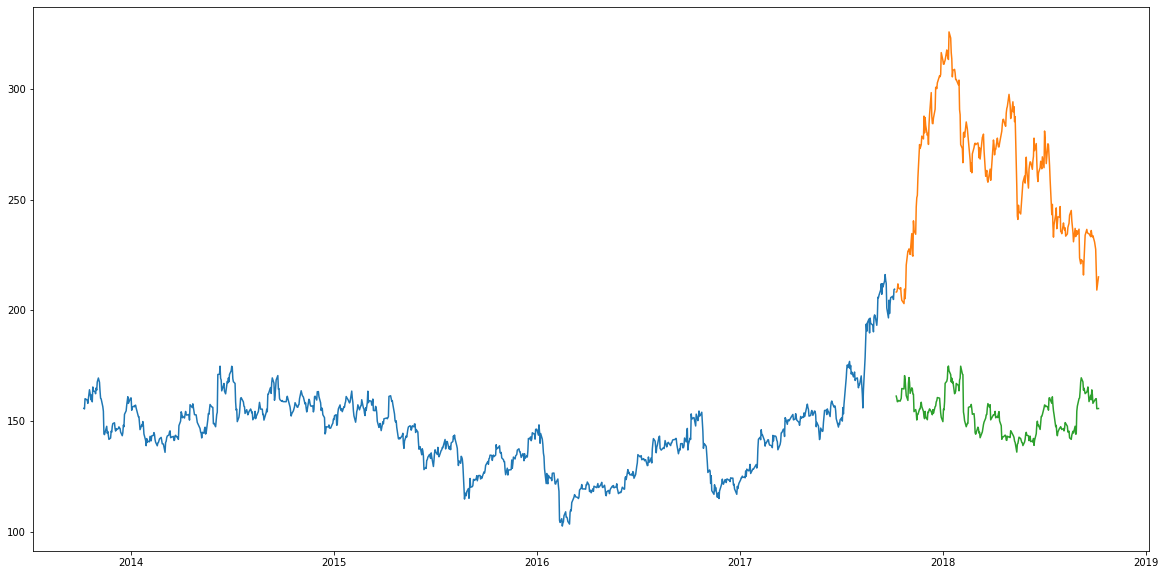

In [ ]:
#Display results
for i in range(0,len(valid_data)):
  valid_data.Predictions[i] = pred[i+988]
  
plt.figure(figsize=(20,10))
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close']])
plt.plot(valid_data[['Predictions']])

In [ ]:
#Display error values
rmse = sqrt (mean_squared_error(pred,valid_data["Close"]))
print("RMSE Score for ARIMA Model: " + str(rmse))
mae = mean_absolute_error(pred,valid_data["Close"])
print("MAE Score for ARIMA Model: " + str(mae))

RMSE Score for ARIMA Model: 113.13833742859062
MAE Score for ARIMA Model: 109.0466368118376


In [ ]:
pip install pmdarima

In [ ]:
#Auto_Arima to find best optimal order
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error
model = auto_arima(df.Close, trace=True, error_action="ignore", suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6655.648, Time=1.67 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6661.936, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6663.890, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6663.891, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6660.157, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6667.318, Time=0.69 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6667.350, Time=1.78 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=6657.229, Time=2.69 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=6657.221, Time=2.54 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6665.921, Time=0.30 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=6660.373, Time=1.78 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=6660.332, Time=1.66 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=6655.985, Time=3.78 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=6653.867, Time=0.86 sec
 ARIMA(1,1,2)(0,0,0)[0]          

# LSTM on Tesla dataset

In [ ]:
#Read dataset
df=pd.read_csv('Tesla.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [ ]:
df.shape

(1692, 7)

In [ ]:
df["Date"]=pd.to_datetime(df.Date,format="%m/%d/20%y")
df.index=df['Date']

Text(0.5, 1.0, 'Tesla Stock Price history')

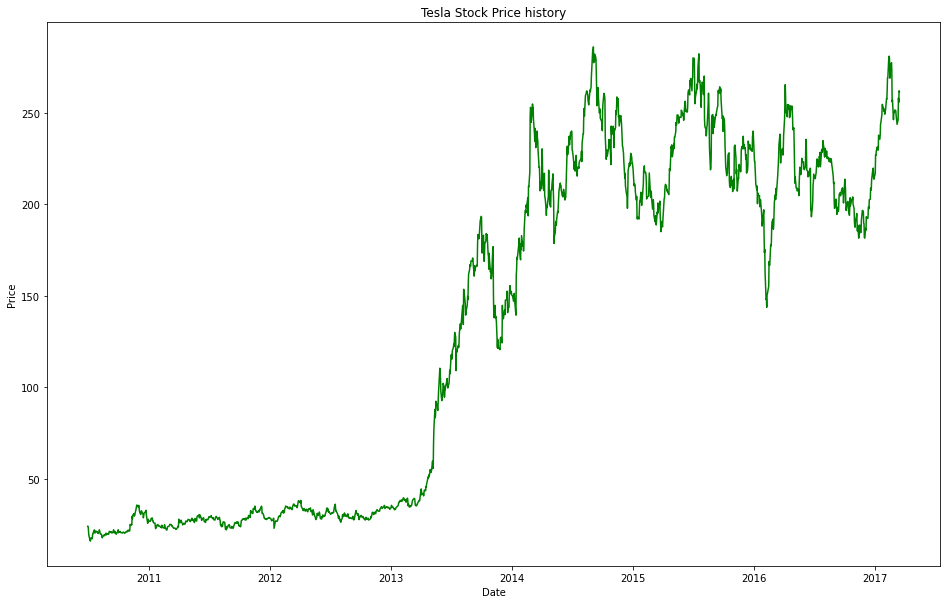

In [ ]:
plt.figure(figsize=(16,10))
plt.plot(df["Close"], "g")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title('Tesla Stock Price history')

In [ ]:
#Use of same preprocessing stage
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
new_dataset

,Date,Close
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
1687,NaN,NaN
1688,NaN,NaN
1689,NaN,NaN
1690,NaN,NaN


In [ ]:
for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["Close"][i]

new_dataset.index=new_dataset.Date
new_dataset.drop("Date",axis=1,inplace=True)

final_dataset=new_dataset.values

new_dataset

In [ ]:
train_data=final_dataset[0:1354,:]
valid_data=final_dataset[1354:,:]

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)

x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

In [ ]:
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)
x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [ ]:
#Creating LSTM Model
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

In [ ]:
#Fitting the model on Tesla dataset
lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=3,batch_size=1,verbose=2)

Epoch 1/3
1294/1294 - 33s - loss: 0.0037 - 33s/epoch - 26ms/step
Epoch 2/3
1294/1294 - 30s - loss: 0.0013 - 30s/epoch - 23ms/step
Epoch 3/3
1294/1294 - 30s - loss: 8.9758e-04 - 30s/epoch - 23ms/step


In [ ]:
inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

In [ ]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

In [ ]:
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
closing_price = lstm_model.predict(X_test)
closing_price=scaler.inverse_transform(closing_price)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


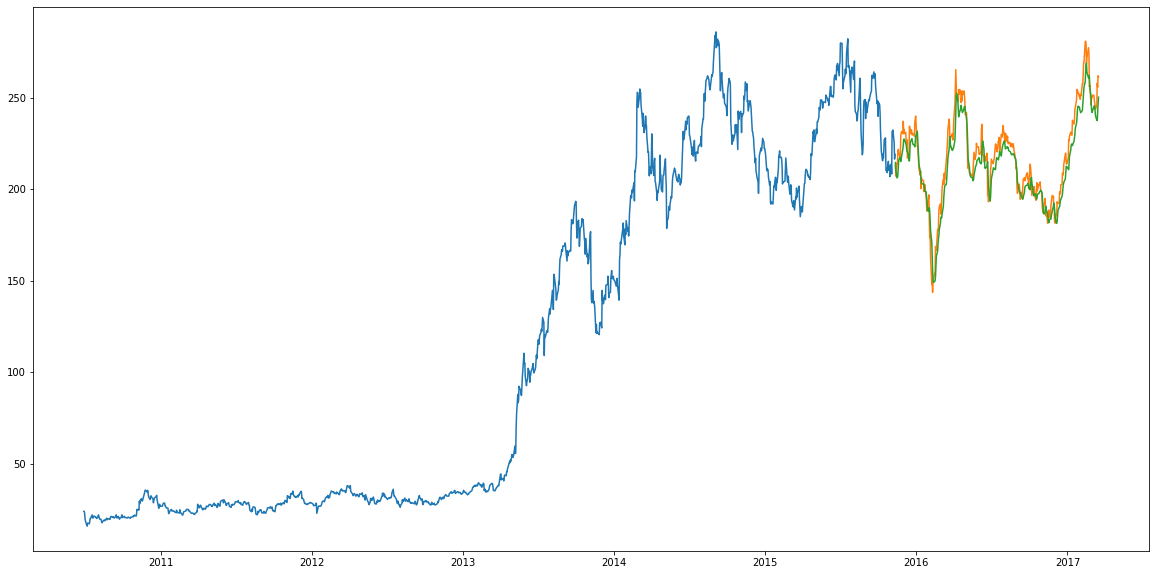

In [ ]:
#Display predictions
train_data=new_dataset[:1354]
valid_data=new_dataset[1354:]
valid_data['Predictions'] = closing_price
plt.figure(figsize=(20,10))
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])

In [ ]:
#View error values
rmse = sqrt (mean_squared_error(closing_price,valid_data["Close"]))
print("RMSE Score for LSTM Model: " + str(rmse))
mae = mean_absolute_error(closing_price,valid_data["Close"])
print("MAE Score for LSTM Model: " + str(mae))

RMSE Score for LSTM Model: 8.363145487627293
MAE Score for LSTM Model: 6.86791201888984


## Conclusion

* LSTM outperformed ARIMA
* LSTM accuracy 20 times better than ARIMA
* After epoch = 25 in LSTM model, there is no effect on prediction accuracy

## References

Understanding LSTM networks. Understanding LSTM Networks -- colah's blog. (n.d.). Retrieved May 11, 2022, from http://colah.github.io/posts/2015-08-Understanding-LSTMs/ 

Stock price prediction - machine learning project in python. DataFlair. (2021, August 25). Retrieved May 11, 2022, from https://data-flair.training/blogs/stock-price-prediction-machine-learning-project-in-python/ 

Stock price prediction using machine learning and LSTM-based deep learning models. Papers With Code. (n.d.). Retrieved May 11, 2022, from https://paperswithcode.com/paper/stock-price-prediction-using-machine-learning 

By:       IBM Cloud Education. (n.d.). What are recurrent neural networks? IBM. Retrieved May 11, 2022, from https://www.ibm.com/cloud/learn/recurrent-neural-networks 

